# LATIHAN

In [73]:
# LATIHAN E
import numpy as np

data = np.array([[0,1], [5,3], [10,15], [15,12], [24,10], [30,30], [85,70], [71,80], [60,78],
       [70,55], [80,91]])
np.savetxt("DataPraktikum3.csv", data, delimiter=",")

In [74]:
import pandas as pd

data = pd.read_csv("DataPraktikum3.csv")

In [75]:
data.head(10)

,0.000000000000000000e+00,1.000000000000000000e+00
0,5.0,3.0
1,10.0,15.0
2,15.0,12.0
3,24.0,10.0
4,30.0,30.0
5,85.0,70.0
6,71.0,80.0
7,60.0,78.0
8,70.0,55.0
9,80.0,91.0


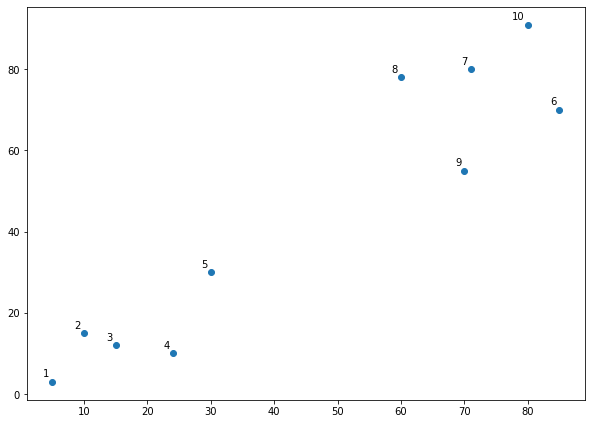

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("DataPraktikum3.csv")
X = data.values
labels = range(1, 11)

plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0], X[:,1], label='True Position')

for label, x, y in zip(labels, X[:,0], X[:,1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-3, 3),
        textcoords='offset points', ha='right', va='bottom'
    )
    
plt.show()

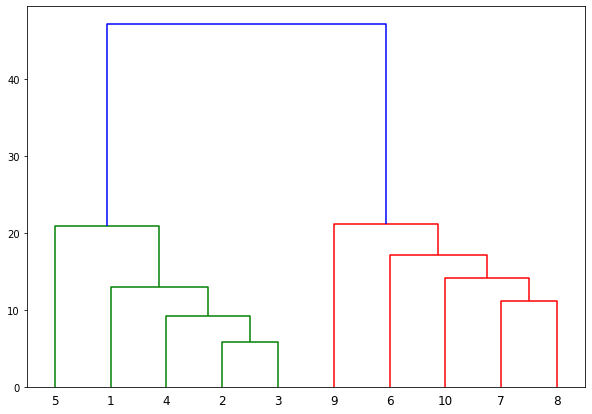

In [77]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')
labelList = range(1, 11)

plt.figure(figsize=(10, 7))

dendrogram(
    linked, orientation='top', labels=labelList,
    distance_sort='descending', show_leaf_counts=True
)

plt.show()

In [78]:
# LATIHAN F
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

data = pd.read_csv('DataPraktikum3.csv')
data = data.values

In [79]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean',
                                  linkage='ward')

cluster.fit_predict(data)

print(cluster.labels_)

[1 1 1 1 1 0 0 0 0 0]


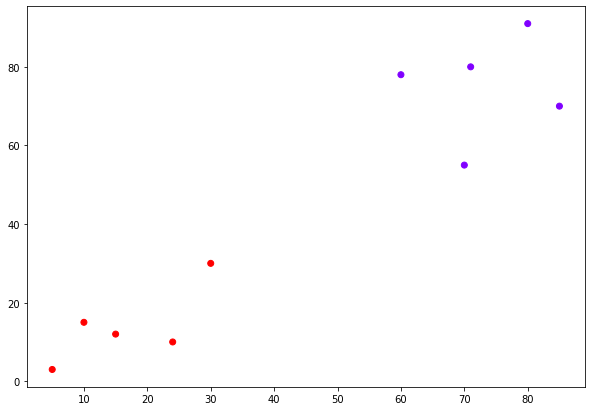

In [80]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

In [81]:
# LATIHAN G
import pandas as pd

dataPelanggan = pd.read_csv('hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv')

dataPelanggan.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [82]:
dataPelanggan.shape

(200, 5)

In [83]:
data = np.array(dataPelanggan[['Annual Income (k$)', 'Spending Score (1-100)']])

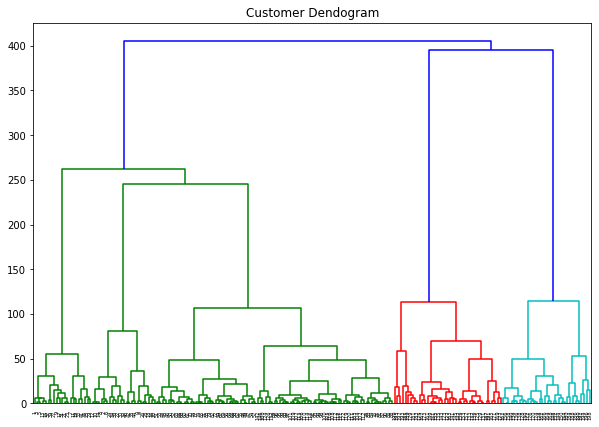

In [84]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Customer Dendogram")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

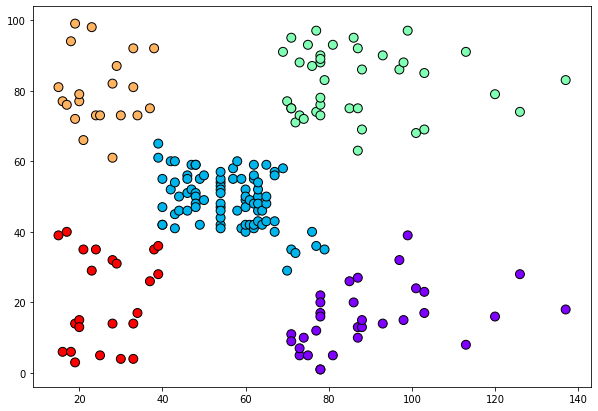

In [85]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean',
                                  linkage='ward')

cluster.fit_predict(data)

plt.figure(figsize=(10,7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, s=80, cmap='rainbow', edgecolor='black')

# TUGAS PRAKTIKUM

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

data = pd.read_csv('hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv')
data = np.array(data[['Annual Income (k$)', 'Spending Score (1-100)']])

In [87]:
# NOMOR 1

# DENDROGRAM YANG BAGUS FUNCTION
def fancy_dendrogram(*args, **kwargs):
    # setting ukuran
    plt.figure(figsize=(20, 10))
    # set label dan title
    plt.title('Hierarchical Clustering Dendrogram (truncated)')
    plt.xlabel('sample index or (cluster size)')
    plt.ylabel('distance')
    
    # return nilai max_d yang ada di dalam kwargs
    max_d = kwargs.pop('max_d', None) 
    
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = shc.dendrogram(*args, **kwargs)
    
    for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        
        # memberi label cluster yang tingginya lebih dari annotate_above
        if y > annotate_above:
            plt.plot(x, y, 'o', c=c)
            plt.annotate("%.5g" % y, (x, y), xytext=(0, -5),
                         textcoords='offset points',
                         va='top', ha='center')
    if (max_d != None):
        plt.axhline(y=max_d, c='red')
    
    return ddata

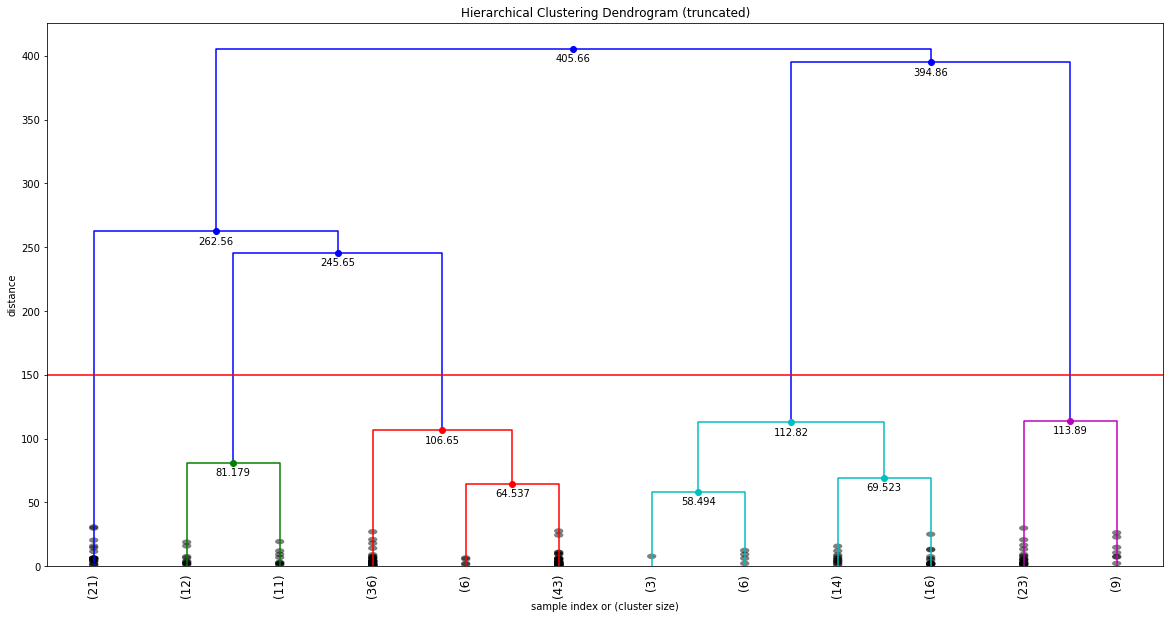

In [92]:
Z = shc.linkage(data, 'ward')

fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=150
)

plt.show()

In [89]:
# NOMOR 2
import operator

# DENDROGRAM AUTOMATIC FUNCTION
def fancy_dendrogram_auto(*args, **kwargs):
    # setting ukuran
    plt.figure(figsize=(20, 10))
    # set label dan title
    plt.title('Hierarchical Clustering Dendrogram (truncated)')
    plt.xlabel('sample index or (cluster size)')
    plt.ylabel('distance')
    
    # return nilai max_d yang ada di dalam kwargs
    max_d = kwargs.pop('max_d', None)    
    
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = shc.dendrogram(*args, **kwargs)
    
    for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        yPos.append(y)
        
        # memberi label cluster yang tingginya lebih dari annotate_above
        if y > annotate_above:
            plt.plot(x, y, 'o', c=c)
            plt.annotate("%.5g" % y, (x, y), xytext=(0, -5),
                         textcoords='offset points',
                         va='top', ha='center')

    # mengurutkan elemen yPos secara descending
    yPos.sort(reverse=True)
    
    # menghitung jarak antar cluster dan dimasukkan ke dalam list
    for i, val in enumerate(yPos): 
        if(i != len(yPos)-1):
            dist = yPos[i] - yPos[i+1]
            distance.append([yPos[i], yPos[i+1], dist])    
    
    # mengurutkan elemen distance berdasarkan distance
    distance.sort(key=operator.itemgetter(2), reverse=True)
    
    # mengambil titik tengah cluster terbaik untuk penempatan garis
    yLine = (distance[0][0]+distance[0][1])/2
    
    # memberi garis
    plt.axhline(y=yLine, c='red')
    return ddata

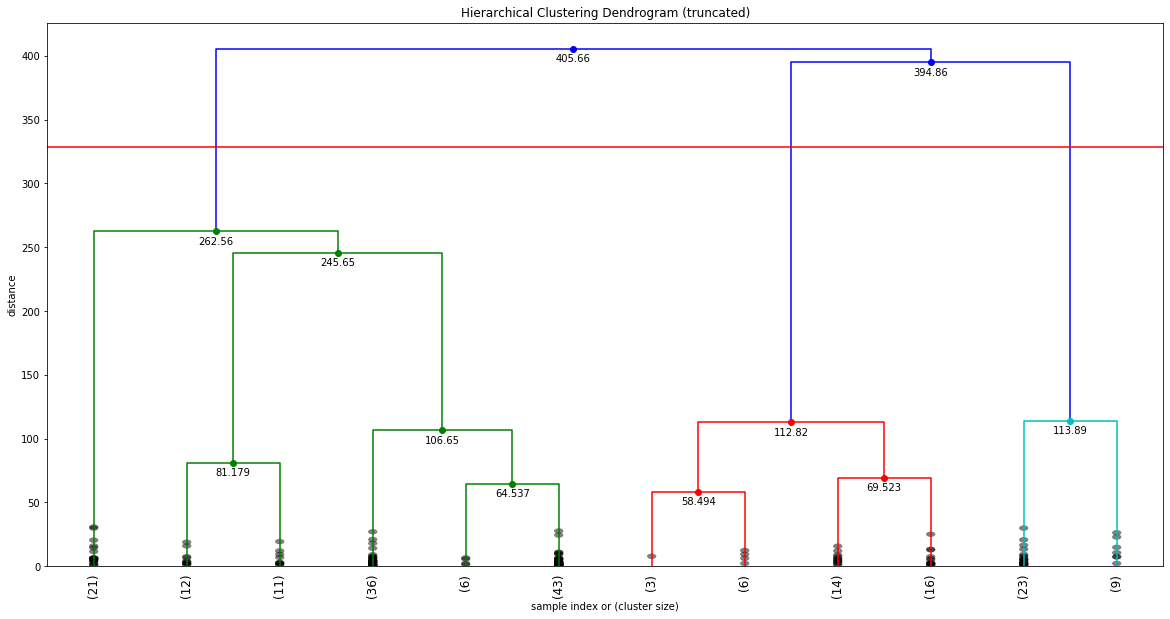

In [90]:
Z = shc.linkage(data, 'ward')
yPos = []
distance = []

fancy_dendrogram_auto(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)

plt.show()

## NOMOR 4
### KESIMPULAN :

Hierarchial Clustering adalah algortima clustering yang mengelompokkan objek
menjadi suatu grup disebut cluster. Hierarchial Clustering divisualisasikan
dengan Dendrogram. Dendrogram adalah diagram yang berbentuk seperti pohon.
Hierarchial Clustering memiliki 2 teknik yaitu :
    1. Agglomerative (AGNES)
    2. Divisive (DIANA)

Pada awalnya Agglomerative menganggap setiap instance adalah satu cluster.
Kemudian mengelompokkan tiap instance di setiap iterasi, hingga 1 cluster atau
K cluster terbentuk.

Divisive adalah kebalikan dari Agglomerative. Pada Awalnya Divisive menganggap
semua instance adalah satu cluster. Kemudian memecah menjadi beberapa cluster
dengan mencari perbedaannya di setiap iterasi, hingga setiap instance terpisah
sebagai individual cluster.